In [1]:
import sys
import os
from pathlib import Path

from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM

# from sklearn.model_selection import GridSearchCV
from itertools import product
# внутренние
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# внешние
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import fowlkes_mallows_score


if (dir := str(Path(os.getcwd()).parent)) not in sys.path:
    sys.path.append(dir)

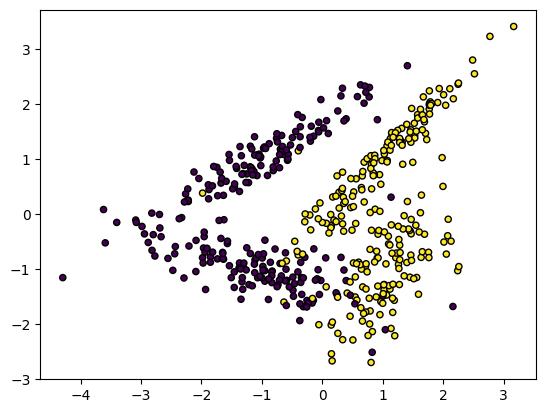

In [2]:
data1, data1_y = make_classification(
    n_samples=500,
    n_classes=2,
    n_features=7,
    n_informative=2,
    random_state=73
)
plt.scatter(data1[:, 0], data1[:, 1], marker='o', c=data1_y, s=20, edgecolor='k')
plt.show()

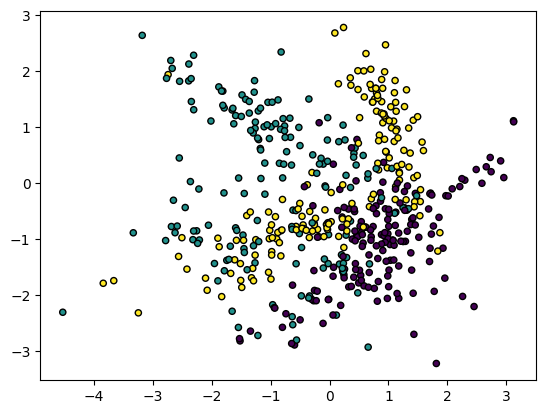

In [3]:
data2, data2_y = make_classification(
    n_samples=500,
    n_classes=3,
    n_clusters_per_class=2,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    flip_y=0.01,
    random_state=73
)
plt.scatter(data2[:, 0], data2[:, 1], marker='o', c=data2_y, s=20, edgecolor='k')
plt.show()

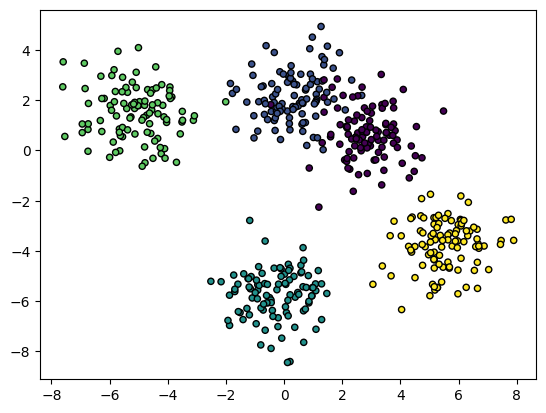

In [4]:
data3, data3_y = make_blobs(
    n_samples=500,
    centers=5,
    random_state=73,
)
plt.scatter(data3[:, 0], data3[:, 1], marker='o', c=data3_y, s=20, edgecolor='k')
plt.show()

## Вспомогательные функции

In [5]:
def print_metrics(data, data_y, estimator_labels):
    print(
        f"""
= + = + = + = + Внешние метрики + = + = + = + =
{'rand_score':>23} = {rand_score(estimator_labels, data_y):.5f}\t (-> 1)
{'fowlkes_mallows_score':>23} = {fowlkes_mallows_score(estimator_labels, data_y):.5f}\t (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
{'silhouette_score':>23} = {silhouette_score(data, estimator_labels):.5f}\t (-> 1)
{'davies_bouldin_score':>23} = {davies_bouldin_score(data, estimator_labels):.5f}\t (-> 0)
"""
    )

In [6]:
def grid_search(params: dict):
    """
    yield grid of params
    """
    param_grid = [product([k], np.unique(v)) for k, v in params.items()]
    for grid in product(*param_grid):  # sorted(product(*param_grid), key=lambda x: x[1:])
        yield dict(tuple(grid))

params = {
    "p1": [4, 5],
    'p2': [10, 11],
    'p3': [-1],
}

print(*grid_search(params))

{'p1': 4, 'p2': 10, 'p3': -1} {'p1': 4, 'p2': 11, 'p3': -1} {'p1': 5, 'p2': 10, 'p3': -1} {'p1': 5, 'p2': 11, 'p3': -1}


In [7]:
def find_best(estimator, data, params: dict = {}):
    res = []
    for grid in grid_search(params):
        model = estimator(**grid).fit(data)
        res.append(
            {
                'silhouette_score': silhouette_score(data, model.labels_),
                'model': model,
            }
        )

    return max(res, key=lambda x: x['silhouette_score'])

## KMeans

In [8]:
from mylib.kmeans import KMeans as KM

## data1


= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.55030	 (-> 1)
  fowlkes_mallows_score = 0.55382	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.28065	 (-> 1)
   davies_bouldin_score = 1.34418	 (-> 0)



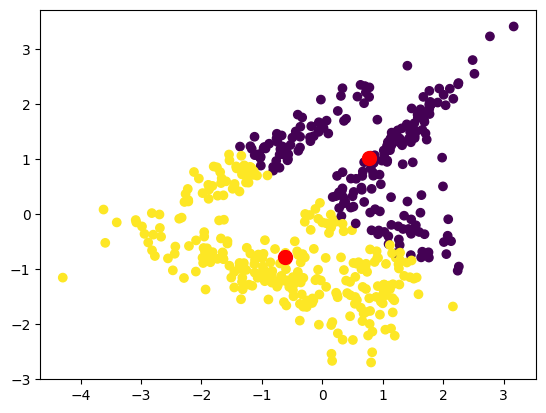

In [12]:
km1 = KM(n_clusters=2).fit(data1)

print_metrics(data1, data1_y, km1.labels_)

plt.scatter(data1[:, 0], data1[:, 1], c=km1.labels_)
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s=100, c='red')


= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.55030	 (-> 1)
  fowlkes_mallows_score = 0.55382	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.28065	 (-> 1)
   davies_bouldin_score = 1.34418	 (-> 0)



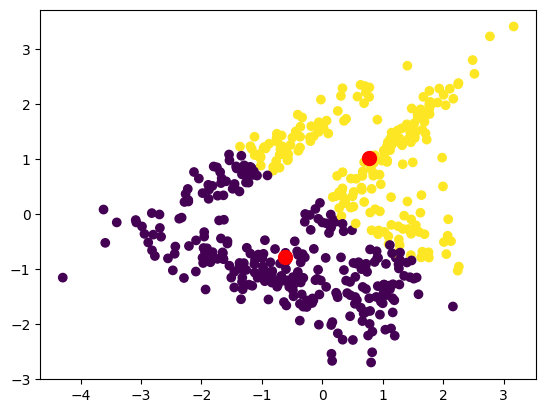

In [13]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(data1)

plt.scatter(data1[:, 0], data1[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

print_metrics(data1, data1_y, kmeans.labels_)

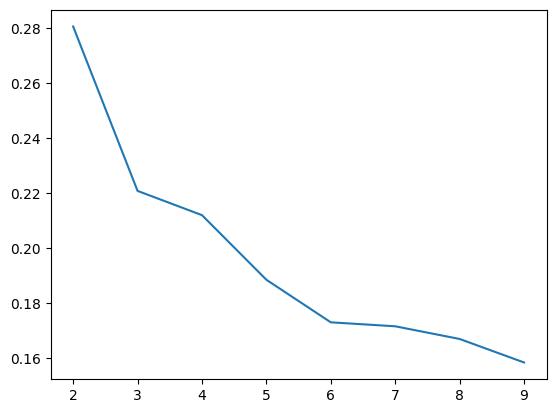

In [8]:
plt.plot(range(2, 10), [silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_) for i in range(2, 10)])

In [13]:
params = {
    'n_clusters': range(2, 10),
    'max_iter': range(200, 401, 20),
    'verbose': [0],
    'init': ['k-means++', 'random'],
    'n_init': ['auto'],
    'random_state': [73],
}

print(find_best(KMeans, data1, params))

# scores = [[] for _ in range(22)]
# grids = list(grid_search(params))
# for i, grid in enumerate(grids):
#     model = KMeans(**grid).fit(data1)
#     scores[i % 22].append(silhouette_score(data1, model.labels_))
# for score in scores:
#     plt.plot(range(2, 10), score)

{'silhouette_score': 0.28064521943660214, 'model': KMeans(max_iter=200, n_clusters=2, n_init='auto', random_state=73)}


{'silhouette_score': 0.1711492589843938, 'model': AffinityPropagation(convergence_iter=5, damping=0.6, max_iter=100,
                    random_state=73)}

= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.52120	 (-> 1)
  fowlkes_mallows_score = 0.20604	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.17115	 (-> 1)
   davies_bouldin_score = 1.28319	 (-> 0)



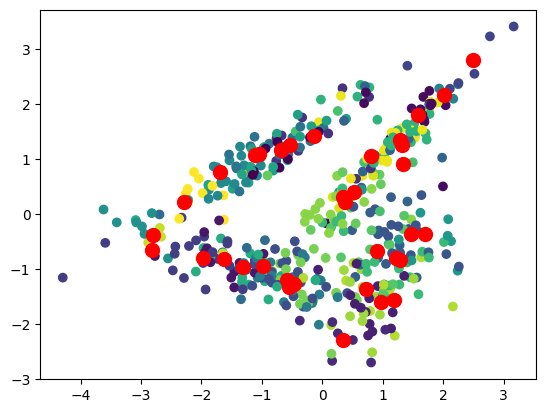

In [21]:
params = {
    'damping': np.arange(0.5, 1, 0.1),
    'max_iter': range(100, 231, 10),
    'convergence_iter': range(5, 26, 5),
    'verbose': [False],
    'random_state': [73],
}

best = find_best(AffinityPropagation, data1, params)
print(best)

afp1: AffinityPropagation = best['model']

plt.scatter(data1[:, 0], data1[:, 1], c=afp1.labels_)
plt.scatter(afp1.cluster_centers_[:, 0], afp1.cluster_centers_[:, 1], s=100, c='red')

print_metrics(data1, data1_y, afp1.labels_)

{'silhouette_score': 0.3852501695568131, 'model': DBSCAN(eps=1.9000000000000008, leaf_size=15)}
[-1  0]

= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.49903	 (-> 1)
  fowlkes_mallows_score = 0.69935	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.38525	 (-> 1)
   davies_bouldin_score = 3.42347	 (-> 0)



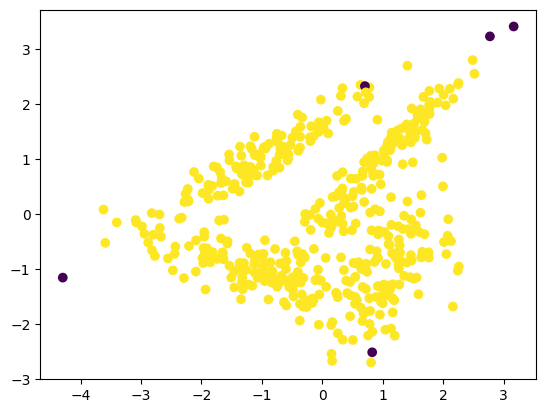

In [34]:
params = {
    'eps': np.arange(1, 2.2, 0.1),
    'min_samples': range(5, 10),
    'leaf_size': range(15, 46, 5),
}

best = find_best(DBSCAN, data1, params)
print(best)

dbscan1: DBSCAN = best['model']

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:, 0], data1[:, 1], c=dbscan1.labels_)

print_metrics(data1, data1_y, dbscan1.labels_)

{'silhouette_score': 0.22461514585136183, 'model': GaussianMixture(n_components=2)}

= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.50621	 (-> 1)
  fowlkes_mallows_score = 0.50903	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.22462	 (-> 1)
   davies_bouldin_score = 1.71149	 (-> 0)



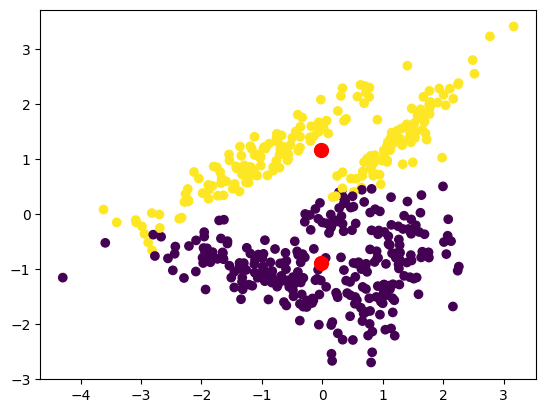

In [48]:
params = {
    'n_components': [2, 3, 4, 5],
}

res = []
for grid in grid_search(params):
    model = GaussianMixture(**grid).fit(data1)
    res.append({
        'silhouette_score': silhouette_score(data1, model.predict(data1)),
        'model': model,
    })

best = max(res, key=lambda x: x['silhouette_score'])
print(best)

gm1: GaussianMixture = best['model']

plt.scatter(data1[:, 0], data1[:, 1], c=gm1.predict(data1))

print_metrics(data1, data1_y, gm1.predict(data1))
plt.scatter(gm1.means_[:, 0], gm1.means_[:, 1], s=100, c='red')


= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.77534	 (-> 1)
  fowlkes_mallows_score = 0.74981	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.14940	 (-> 1)
   davies_bouldin_score = 1.81111	 (-> 0)



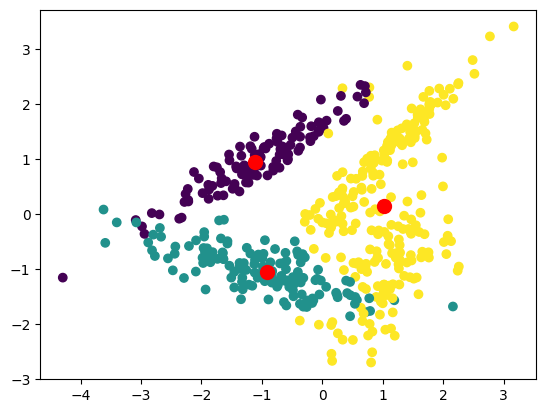

In [54]:
 # ! Искать вручную?
gm1: GaussianMixture = GaussianMixture(n_components=3).fit(data1)

plt.scatter(data1[:, 0], data1[:, 1], c=gm1.predict(data1))

print_metrics(data1, data1_y, gm1.predict(data1))
plt.scatter(gm1.means_[:, 0], gm1.means_[:, 1], s=100, c='red')

{'silhouette_score': 0.27706863833614526, 'model': AgglomerativeClustering()}

= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.53716	 (-> 1)
  fowlkes_mallows_score = 0.60127	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.27707	 (-> 1)
   davies_bouldin_score = 1.23920	 (-> 0)



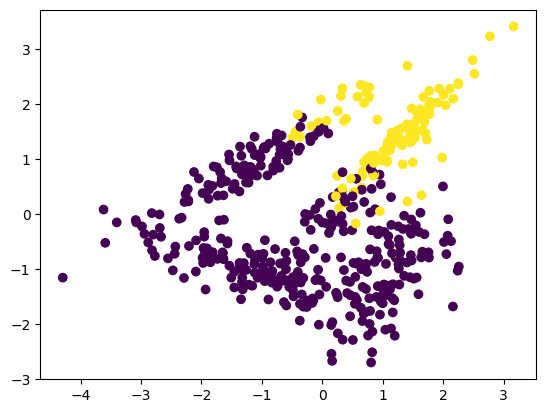

In [70]:
params = {
    'n_clusters': [2, 3, 4, 5],
}

best = find_best(AgglomerativeClustering, data1, params)
print(best)

agc1: AgglomerativeClustering = best['model']

plt.scatter(data1[:, 0], data1[:, 1], c=agc1.labels_)
print_metrics(data1, data1_y, agc1.labels_)

In [89]:
params = {
    'dim': [7],
    'random_state': [73],
    'n': range(3, 6),
    'm': range(3, 6),
    'lr': range(1, 6),
    'sigma': range(1, 6),
}

res = []
for grid in grid_search(params):
    model: SOM = SOM(**grid)
    res.append({
        'silhouette_score': silhouette_score(data1, model.fit_predict(data1)),
        'model': model,
    })

best = max(res, key=lambda x: x['silhouette_score'])
print(best)

som1: SOM = best['model']
print_metrics(data1, data1_y, som1.predict(data1))

{'silhouette_score': 0.11698373922993532, 'model': <sklearn_som.som.SOM object at 0x000002E4B5E79940>}

= + = + = + = + Внешние метрики + = + = + = + =
             rand_score = 0.56861	 (-> 1)
  fowlkes_mallows_score = 0.38516	 (-> 1)

= + = + = + = + Внутренние метрики + = + = + = + =
       silhouette_score = 0.11698	 (-> 1)
   davies_bouldin_score = 1.80627	 (-> 0)



## data2

## data3